# Performance Evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

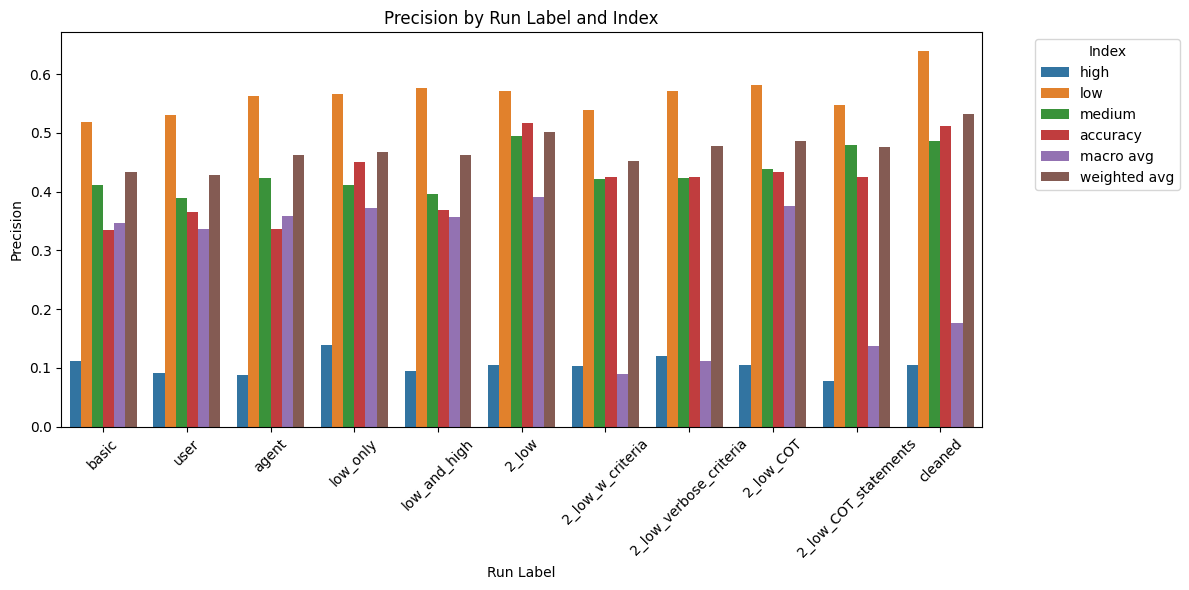

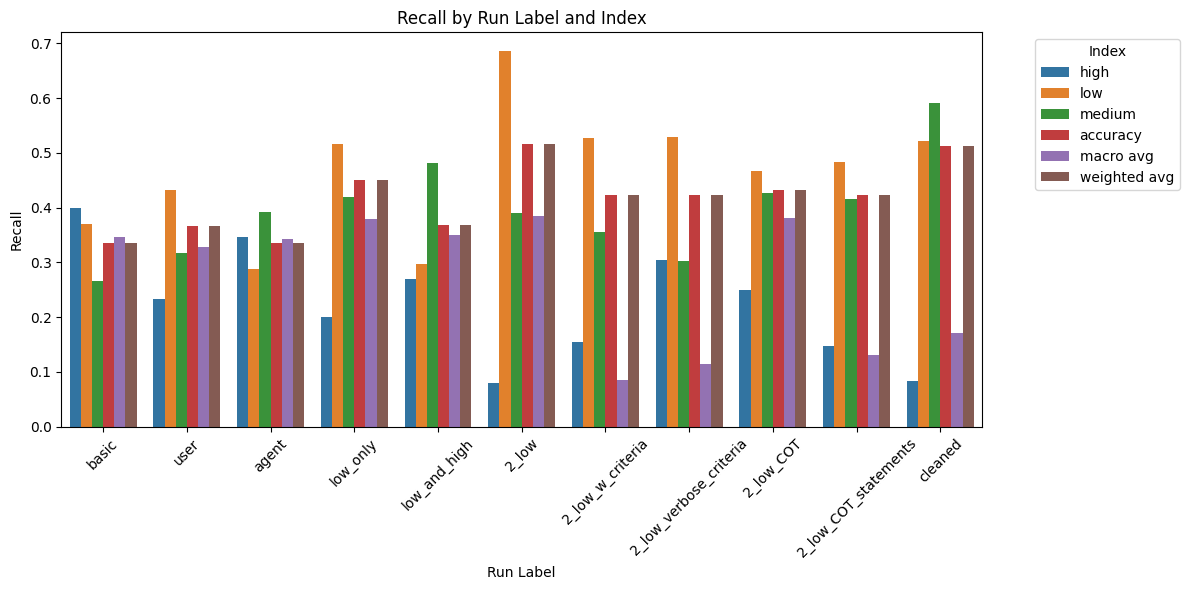

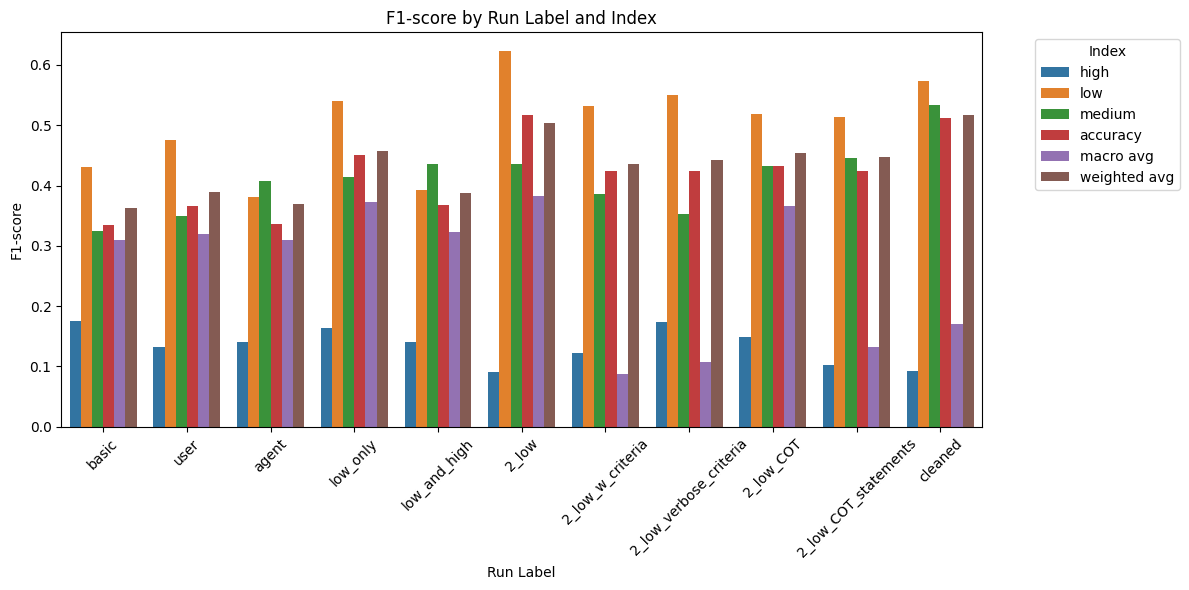

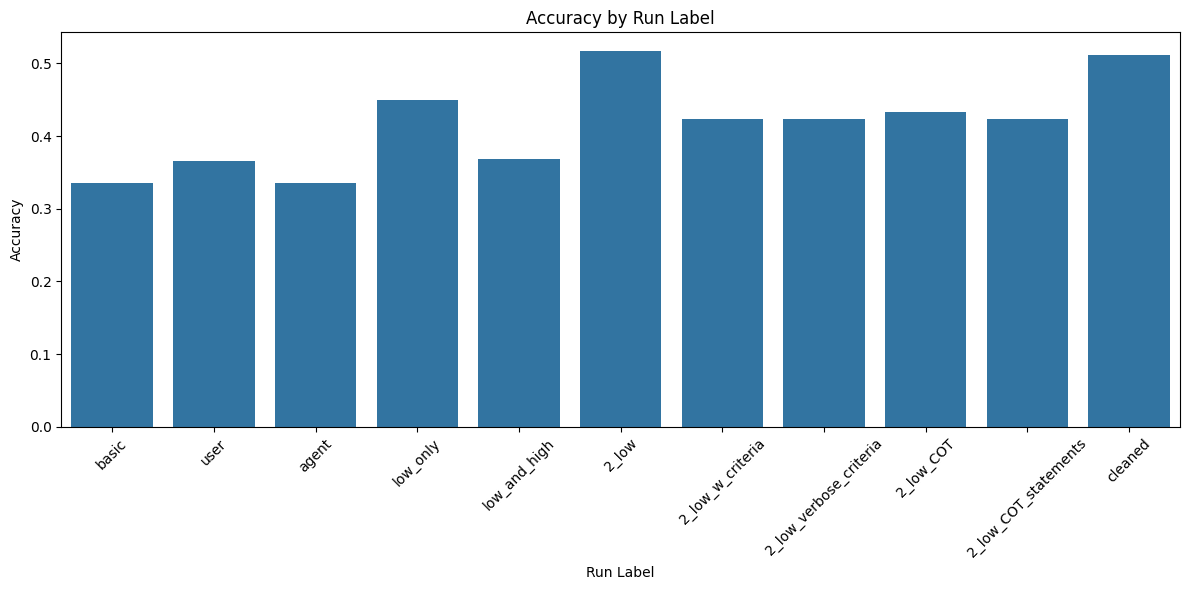

In [2]:

file_path = '/Users/RiRi/Desktop/github/convo-quality/src/LLM_classification_pipeline/logs/eval.csv'  
df = pd.read_csv(file_path)

# Filter out irrelevant rows (like conversations)
df = df[~df['index'].str.contains('conversation', na=False)]
df = df[~df['index'].str.contains(r'^\d', na=False)]  # Remove rows with numbers in 'index'

# Convert columns to appropriate types
df['precision'] = pd.to_numeric(df['precision'], errors='coerce')
df['recall'] = pd.to_numeric(df['recall'], errors='coerce')
df['f1-score'] = pd.to_numeric(df['f1-score'], errors='coerce')
df['support'] = pd.to_numeric(df['support'], errors='coerce')

# Metrics to plot
metrics = ['precision', 'recall', 'f1-score']

# Plot metrics for each index across run_labels
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='run_label', y=metric, hue='index')
    plt.title(f'{metric.capitalize()} by Run Label and Index')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Run Label')
    plt.xticks(rotation=45)
    plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot accuracy separately
accuracy_df = df[df['index'] == 'accuracy']
plt.figure(figsize=(12, 6))
sns.barplot(data=accuracy_df, x='run_label', y='precision')  # Precision column holds accuracy
plt.title('Accuracy by Run Label')
plt.ylabel('Accuracy')
plt.xlabel('Run Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


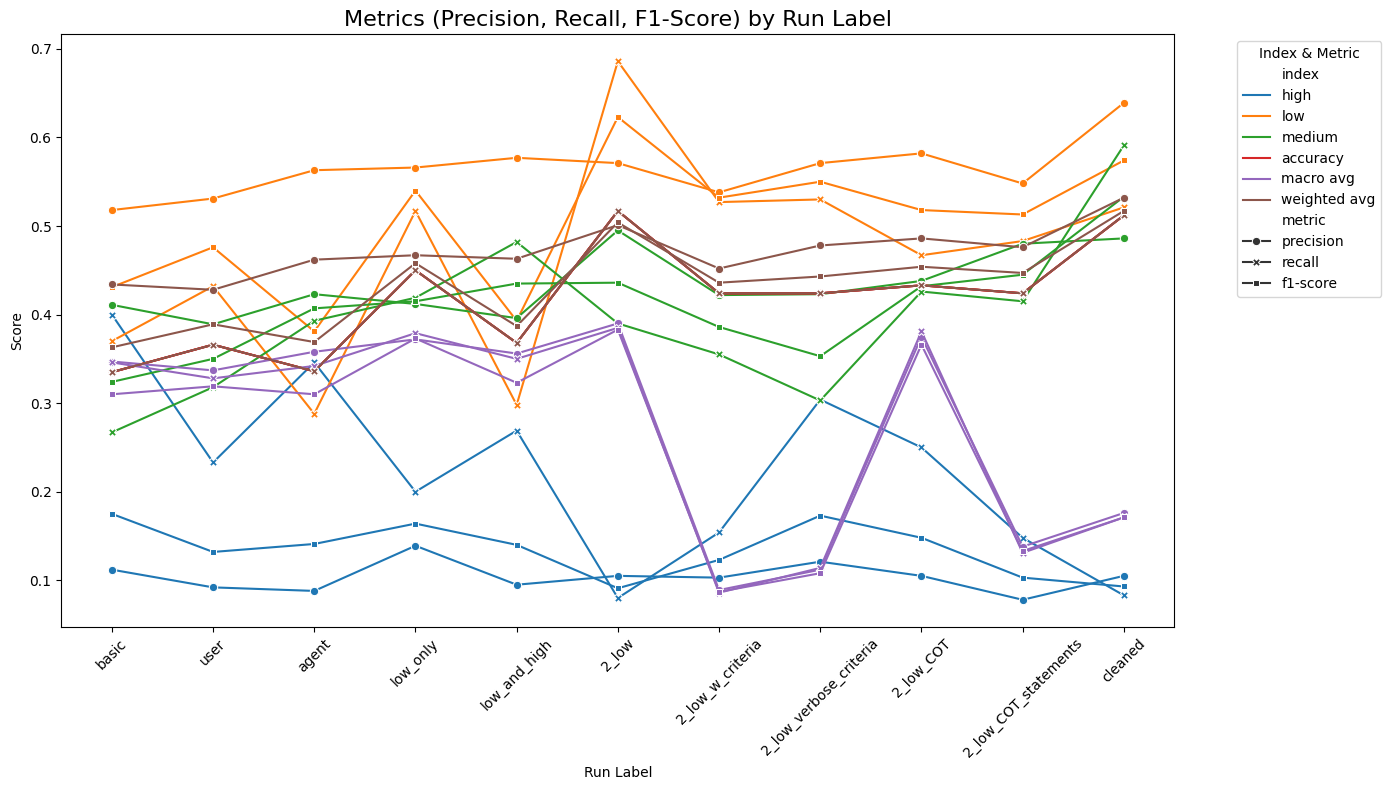

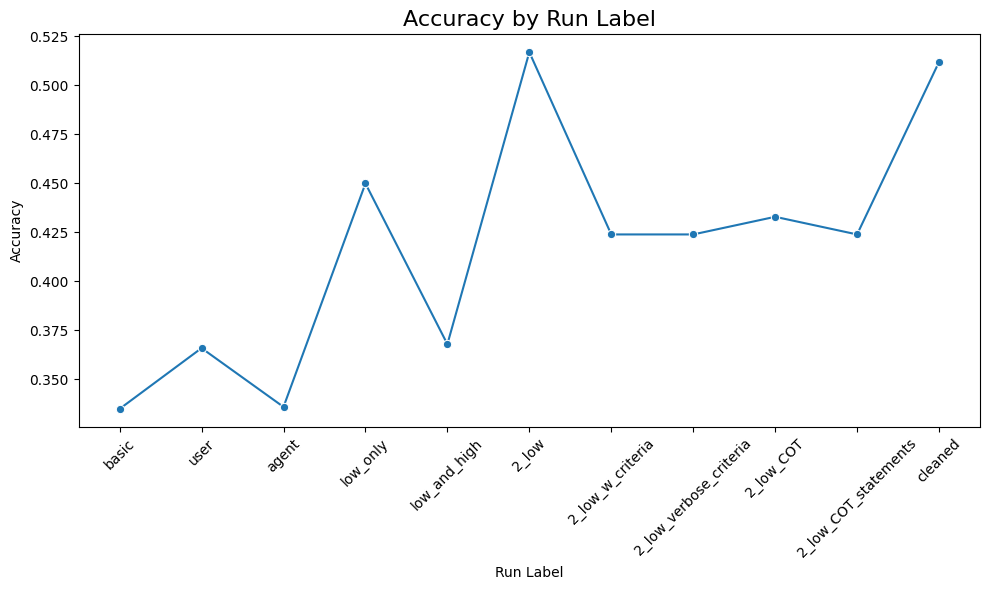

In [4]:
# Filter out irrelevant rows (e.g., conversations)
df = df[~df['index'].str.contains('conversation', na=False)]
df = df[~df['index'].str.contains(r'^\d', na=False)]  # Remove rows with numbers in 'index'

# Convert columns to appropriate types
df['precision'] = pd.to_numeric(df['precision'], errors='coerce')
df['recall'] = pd.to_numeric(df['recall'], errors='coerce')
df['f1-score'] = pd.to_numeric(df['f1-score'], errors='coerce')
df['support'] = pd.to_numeric(df['support'], errors='coerce')

# Melt the data for easier plotting
melted_df = df.melt(
    id_vars=['index', 'run_label'], 
    value_vars=['precision', 'recall', 'f1-score'], 
    var_name='metric', 
    value_name='value'
)

# Plot line graphs for metrics by run_label and index
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=melted_df, 
    x='run_label', 
    y='value', 
    hue='index', 
    style='metric', 
    markers=True, 
    dashes=False
)
plt.title('Metrics (Precision, Recall, F1-Score) by Run Label', fontsize=16)
plt.ylabel('Score')
plt.xlabel('Run Label')
plt.xticks(rotation=45)
plt.legend(title='Index & Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot accuracy separately
accuracy_df = df[df['index'] == 'accuracy']
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=accuracy_df, 
    x='run_label', 
    y='precision',  # Precision column holds accuracy
    marker='o'
)
plt.title('Accuracy by Run Label', fontsize=16)
plt.ylabel('Accuracy')
plt.xlabel('Run Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


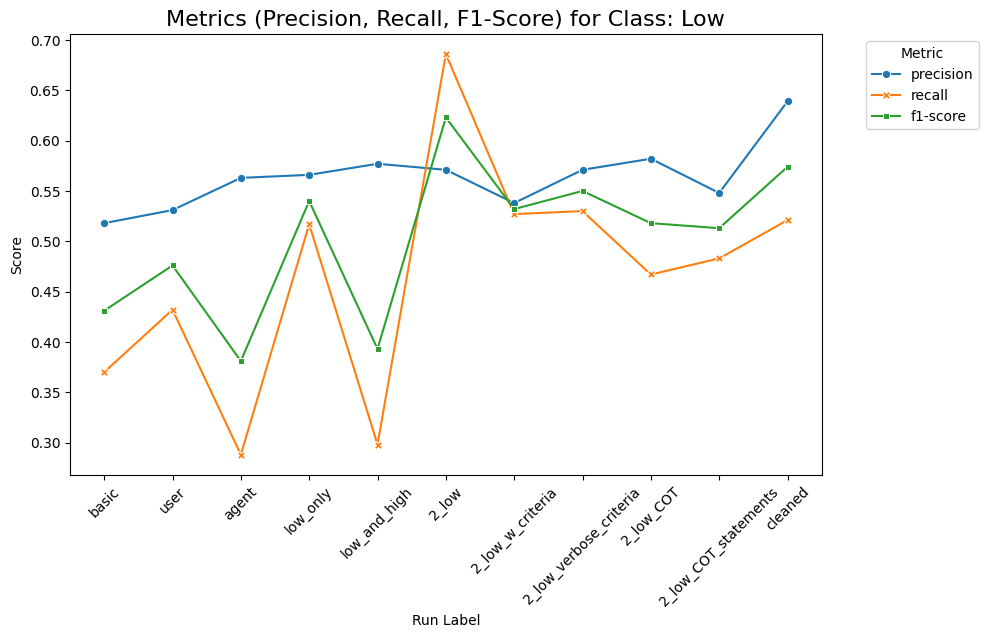

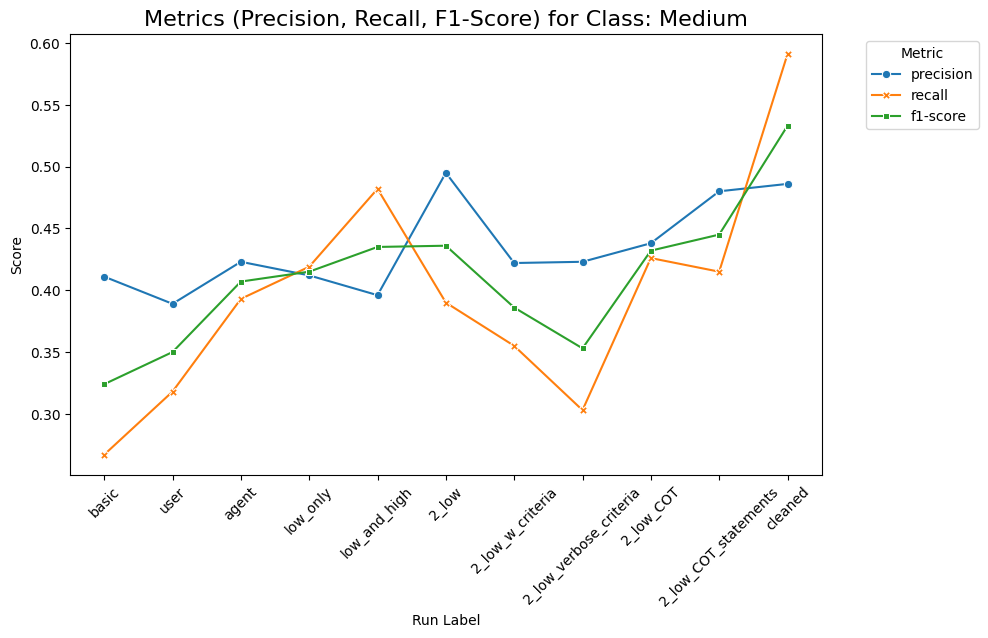

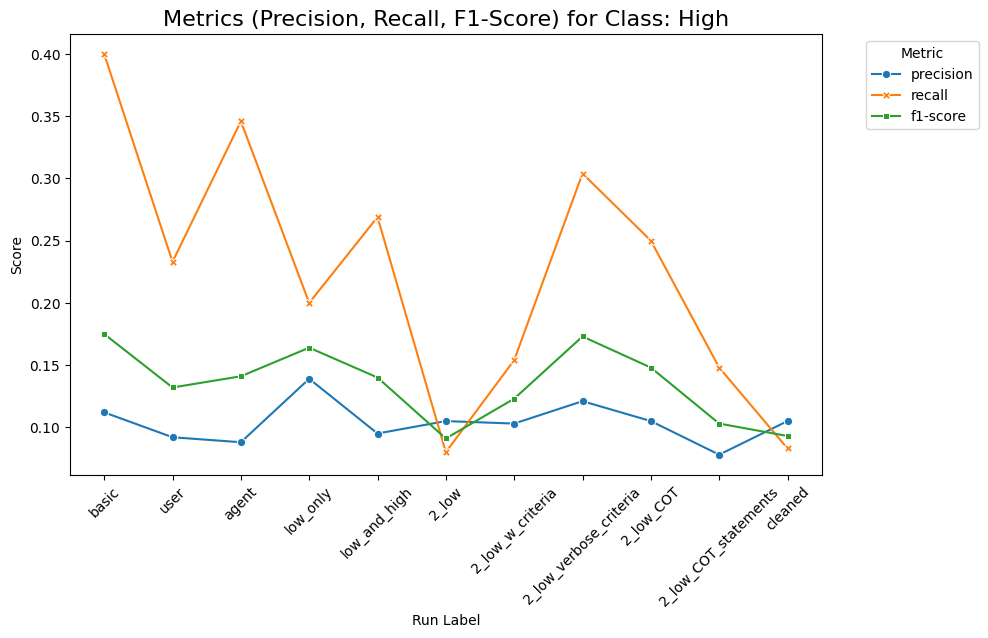

In [6]:
# Filter out irrelevant rows (e.g., conversations)
df = df[~df['index'].str.contains('conversation', na=False)]
df = df[~df['index'].str.contains(r'^\d', na=False)]  # Remove rows with numbers in 'index'

# Convert columns to appropriate types
df['precision'] = pd.to_numeric(df['precision'], errors='coerce')
df['recall'] = pd.to_numeric(df['recall'], errors='coerce')
df['f1-score'] = pd.to_numeric(df['f1-score'], errors='coerce')
df['support'] = pd.to_numeric(df['support'], errors='coerce')

# Melt the data for easier plotting
melted_df = df.melt(
    id_vars=['index', 'run_label'], 
    value_vars=['precision', 'recall', 'f1-score'], 
    var_name='metric', 
    value_name='value'
)

# Get unique classes
classes = ['low', 'medium', 'high']

# Create a separate line chart for each class
for cls in classes:
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=melted_df[melted_df['index'] == cls], 
        x='run_label', 
        y='value', 
        hue='metric', 
        style='metric', 
        markers=True, 
        dashes=False
    )
    plt.title(f'Metrics (Precision, Recall, F1-Score) for Class: {cls.capitalize()}', fontsize=16)
    plt.ylabel('Score')
    plt.xlabel('Run Label')
    plt.xticks(rotation=45, ha='center')  # Center-align the x-tick labels
    plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Add space for x-axis labels
    plt.show()


In [ ]:
#GTPT 4
# Filter out irrelevant rows (e.g., conversations)
df = pd.read_csv('/Users/RiRi/Desktop/github/convo-quality/src/LLM_classification_pipeline/logs/eval_gpt4.csv')
df = df[~df['index'].str.contains('conversation', na=False)]
df = df[~df['index'].str.contains(r'^\d', na=False)]  # Remove rows with numbers in 'index'

# Convert columns to appropriate types
df['precision'] = pd.to_numeric(df['precision'], errors='coerce')
df['recall'] = pd.to_numeric(df['recall'], errors='coerce')
df['f1-score'] = pd.to_numeric(df['f1-score'], errors='coerce')
df['support'] = pd.to_numeric(df['support'], errors='coerce')

# Melt the data for easier plotting
melted_df = df.melt(
    id_vars=['index', 'run_label'], 
    value_vars=['precision', 'recall', 'f1-score'], 
    var_name='metric', 
    value_name='value'
)

# Get unique classes
classes = ['low', 'medium', 'high']

# Create a separate line chart for each class
for cls in classes:
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=melted_df[melted_df['index'] == cls], 
        x='run_label', 
        y='value', 
        hue='metric', 
        style='metric', 
        markers=True, 
        dashes=False
    )
    plt.title(f'Metrics (Precision, Recall, F1-Score) for Class: {cls.capitalize()}', fontsize=16)
    plt.ylabel('Score')
    plt.xlabel('Run Label')
    plt.xticks(rotation=45, ha='center')  # Center-align the x-tick labels
    plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Add space for x-axis labels
    plt.show()


# Error Analysis

In [11]:
import pandas as pd
dat = pd.read_csv('/Users/RiRi/Desktop/github/convo-quality/data/output/LLM/sample_scored_PROMPT2_low.csv')
dat.head()


dat= dat[~dat['predicted_label'].astype(str).str.startswith('"')]
dat= dat.applymap(lambda x: x.lower() if isinstance(x, str) else x)
wrong = dat[dat['satisfaction_rating']!=dat['predicted_label']]
wrong_ids = wrong['conv_id']

/var/folders/86/342cc_xx61zdhxc_bdjg3l540000gn/T/ipykernel_7265/2546322828.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat= dat.applymap(lambda x: x.lower() if isinstance(x, str) else x)


(143,)

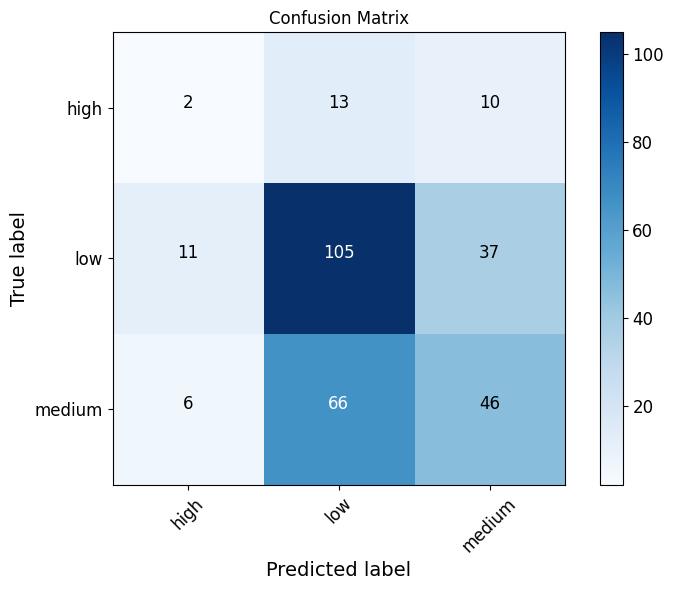

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
actual = dat['satisfaction_rating']
pred = dat['predicted_label']

# Evaluate performance
# accuracy = accuracy_score(actual, pred)
# report = classification_report(actual, pred, output_dict=True)
# report_df = pd.DataFrame(report).transpose()
conf_matrix = confusion_matrix(actual, pred)

def plot_confusion_matrix(conf_matrix, classes, save_path=None):
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=12)
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    # Add text annotations
    thresh = conf_matrix.max() / 2.
    for i, j in [(i, j) for i in range(conf_matrix.shape[0]) for j in range(conf_matrix.shape[1])]:
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 fontsize=12,
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()


plot_confusion_matrix(conf_matrix, dat['satisfaction_rating'].unique())


In [15]:
wrong_ids = wrong['conv_id']

nonLLM = pd.read_csv('/Users/RiRi/Desktop/github/convo-quality/data/output/nonLLM/features.csv')
nonLLM = nonLLM[nonLLM['conv_ID'].isin(wrong_ids)]
nonLLM.shape


(3274, 28)

In [17]:
nonLLM.to_csv('/Users/RiRi/Desktop/github/convo-quality/data/output/LLM/misclassified_w_features.csv', index=False)

In [46]:
wrong[(wrong['satisfaction_rating']=='low') &(wrong['predicted_label']=='medium')].conv_id.values

array([140, 500,  24, 838, 297, 494, 544, 867, 308, 590, 680, 788, 645,
       717, 937, 426, 893, 979, 560, 722, 111, 364, 990, 949, 332, 908,
        50, 897, 964, 790, 895,   6, 267, 732, 119, 228, 465])

In [48]:
raw_w_id = pd.read_csv('/Users/RiRi/Desktop/github/convo-quality/data/output/nonLLM/mwoz_0processed.csv')
raw_w_id[raw_w_id['ConvID']==140
         ]

,index,Speaker,Text,Domain-Intent,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5,Domain,Intent,avg_rating,ConvID,turn_id
3286,3286,USER,I'm looking for a certain hotel someone recomm...,Hotel-Inform,3.0,5.0,3.0,3.0,NaN,Hotel,Inform,3.50,140,0
3287,3287,SYSTEM,I have the gonville hotel. It is in the centre...,Hotel-Inform,NaN,NaN,NaN,NaN,NaN,Hotel,Inform,NaN,140,1
3288,3288,USER,"Yes, please, I need a room for 3 nights for on...",Hotel-Inform,3.0,5.0,3.0,3.0,NaN,Hotel,Inform,3.50,140,2
3289,3289,SYSTEM,I am sorry there are no rooms available at tha...,Hotel-Request,NaN,NaN,NaN,NaN,NaN,Hotel,Request,NaN,140,3
3290,3290,USER,How about a different hotel in the same price ...,Hotel-Inform,3.0,5.0,3.0,3.0,NaN,Hotel,Inform,3.50,140,4
3291,3291,SYSTEM,How about the University Arms Hotel? It is in ...,Hotel-Recommend,NaN,NaN,NaN,NaN,NaN,Hotel,Recommend,NaN,140,5
3292,3292,USER,What time is check in at this hotel?,NaN,3.0,3.0,4.0,3.0,NaN,NaN,NaN,3.25,140,6
3293,3293,SYSTEM,Check-in here is anytime after 3pm. How does t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140,7
3294,3294,USER,Is that rated similar to the other one?,NaN,3.0,5.0,3.0,3.0,NaN,NaN,NaN,3.50,140,8
3295,3295,SYSTEM,The rating is actually one star better. Is tha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140,9
